In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [86]:
data=pd.read_csv('Housing data Linear Reg.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [87]:
# Clean column names
data.columns = data.columns.str.strip()

# Convert yes/no columns to 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for col in binary_cols:
    if col in data.columns:
        data[col] = data[col].astype(str).map({'yes': 1, 'no': 0})



# One-hot encode furnishingstatus (all categories)
if 'furnishingstatus' in data.columns:
    data['furnishingstatus'] = data['furnishingstatus'].apply(lambda x: 2 if x=='furnished' else (1 if x=='semi-furnished' else 0))



# Check processed data
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  furnishingstatus  
0         0                0                1        2                 2  
1         0                0                1        3                 2  
2         1                0                0        2                 1  
3         1                0                1        3                 2  
4         1                0                1        2                 2  


In [91]:
# Features (all columns except price)
X = data.drop('price', axis=1)

# Target variable
y = data['price']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Intercept (b0)
print("Intercept (b0):", model.intercept_)

# Coefficients (b1, b2, ...)
coefficients = model.coef_
print("Coefficients:", list(zip(X.columns, coefficients)))

Intercept (b0): -230801.09015680943
Coefficients: [('area', np.float64(252.68072822159027)), ('bedrooms', np.float64(99584.33620893734)), ('bathrooms', np.float64(1058085.7386461669)), ('stories', np.float64(402470.7737534189)), ('mainroad', np.float64(492839.8975367941)), ('guestroom', np.float64(279380.90798789216)), ('basement', np.float64(489623.10601182596)), ('hotwaterheating', np.float64(632878.3811534904)), ('airconditioning', np.float64(790165.8929258019)), ('parking', np.float64(228904.46049392794)), ('furnishingstatus', np.float64(216730.1870007666))]


In [97]:
# Predict house prices for the test set
y_pred = model.predict(X_test)


# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Residual Sum of Squares
rss = np.sum((y_test - y_pred)**2)
print("Residual Sum of Squares (RSS):", rss)


Mean Squared Error: 1852745807729.1367
Residual Sum of Squares (RSS): 201949293042475.9


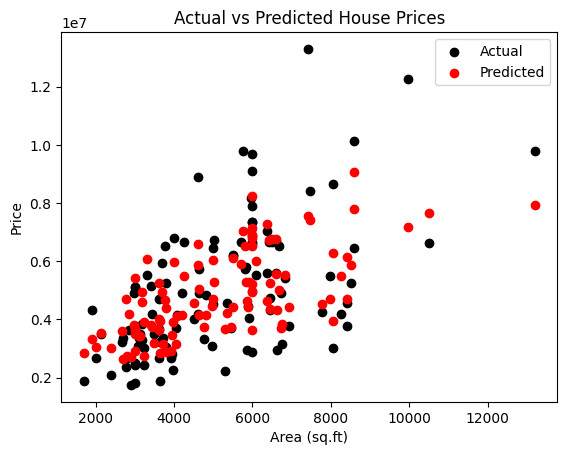

In [100]:
plt.scatter(X_test['area'], y_test, color='black', label='Actual')

plt.scatter(X_test['area'], y_pred, color='red', label='Predicted')

plt.xlabel('Area (sq.ft)')
plt.ylabel('Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()